In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Properties of Covariance ##

Let's examine how covariance behaves. In the next two sections we will use our observations to calculate variances of sample sums.

Establishing properties of covariance involves simple observations and routine algebra. We have done some of it below, and we expect that you can fill in the rest.

Recall that the covariance of $X$ and $Y$ is 

$$
Cov(X, Y) ~ = ~ E(D_XD_Y) ~ = ~ E[(X - \mu_X)(Y - \mu_Y)]
$$

### Constants Don't Vary ###
That title has a "duh" quality. But it's still worth noting that for any constant $c$,

$$
Cov(X, c) = 0
$$

### Variance is a Covariance ##
Covariance is an extension of the concept of variance, because

$$
Var(X) = E(D_X^2) = E(D_XD_X) = Cov(X, X)
$$

The variance of $X$ is the covariance of $X$ and itself.

### Covariance is Symmetric ###
Clearly $Cov(Y, X) = Cov(X, Y)$. It follows that

$$
Var(X + Y) = Var(X) + Var(Y) + 2Cov(X, Y) = Var(X) + Var(Y) + Cov(X, Y) + Cov(Y, X)
$$

This way of thinking about the variance of a sum will be useful later.

### Covariance and Expected Products ###
Covariance *is* an expected product: it is the expected product of deviations. It can also be written in terms of the expected product of $X$ and $Y$, as follows.

$$
\begin{align*}
Cov(X, Y) &= E[(X - \mu_X)(Y - \mu_Y)] \\
&= E(XY) - E(X)\mu_Y - \mu_XE(Y) + \mu_X\mu_Y \\
&= E(XY) - \mu_X\mu_Y
\end{align*}
$$

So covariance is the *mean of the product minus the product of the means*. 

Set $X = Y$ in this result to get the "computational" formula for the variance as the mean of the square minus the square of the mean.

This result simplifies proofs of facts about covariance, as you will see below. But as a computational tool, it is only useful when the distributions of $X$ and $Y$ are very simple – for example, when each has just a few possible values. In other calculations of covariance it is rarely a good idea to try to use this result. Rather, we will use the bilinearity property described at the end of this section.

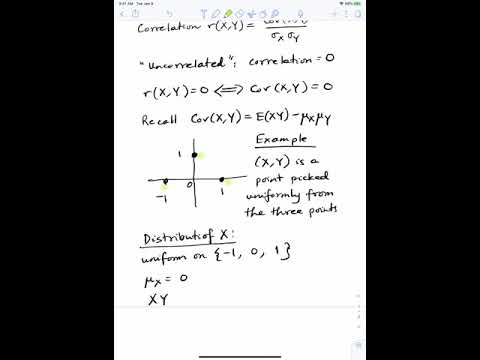

In [2]:
# VIDEO: Uncorrelated but Not Independent
from IPython.display import YouTubeVideo

YouTubeVideo('_FG4CxA6_9A')

```{admonition} Quick Check
Let $(X, Y)$ be one point picked at random from the four points $(0, 0)$, $(1, 0)$, $(0.5, 1)$, $(1.5, 1)$.

(a) Find $E(XY)$.

(b) Find $Cov(X, Y)$.


```

```{admonition} Answer
:class: dropdown
(a) $0.5$

(b) $0.125$


```

### Independent Implies Uncorrelated ###
Let $X$ and $Y$ be independent. Then

$$
\begin{align*}
E(XY) &= \sum_x\sum_y xyP(X=x, Y=y) ~~~~~~ \text{(expectation of a function)} \\
&= \sum_x\sum_y xyP(X=x)P(Y=y) ~~~~ \text{(independence)} \\
&= \sum_x xP(X=x) \sum_y yP(Y=y) \\
&= E(X)E(Y)
\end{align*}
$$

Therefore if $X$ and $Y$ are independent, then $Cov(X, Y) = 0$. We say that $X$ and $Y$ are *uncorrelated*.

To summarize, independent random variables are uncorrelated. But it is not true that uncorrelated random variables have to be independent.

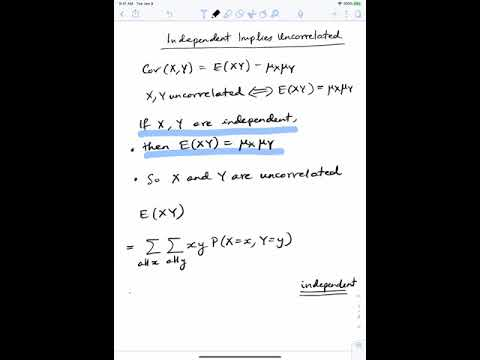

In [3]:
# VIDEO: Independent Implies Uncorrelated

YouTubeVideo('y8GIvXI7b-s')

### Addition Rule ###
A routine application of the calculation of covariance using the expected product shows that for any random variables $X$, $Y$, and $Z$,

$$
Cov(X+Y, Z) ~ = ~ Cov(X, Z) + Cov(Y, Z)
$$

Just write $Cov(X+Y, Z) = E[(X+Y)Z] - E(X+Y)E(Z)$, expand both products, and collect terms.

```{admonition} Quick Check
Let $X$ and $Y$ be independent and suppose $Var(X) = 10$. Find $Cov(X, X+Y)$.

```

```{admonition} Answer
:class: dropdown
$10$

```

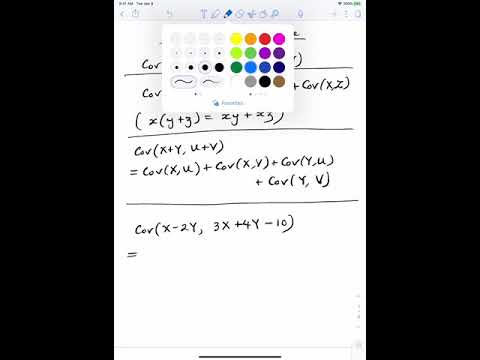

In [4]:
# VIDEO: Bilinearity of Covariance

YouTubeVideo('Fs-rX3jdErU')

### The Main Property: Bilinearity ###
**This property is the key to calculating covariance.** First, easy algebra shows that for constants $a$ and $b$,

$$
Cov(aX, bY) = abCov(X, Y)
$$

Put this together with the addition rule to get

$$
Cov(aX + bY, cZ) = acCov(X, Z) + bcCov(Y, Z)
$$

You can see that covariance behaves like products. By induction,

$$
Cov(\sum_{i=1}^n a_iX_i, \sum_{j=1}^m b_jY_j) ~ = ~
\sum_{i=1}^n\sum_{j=1}^m a_ib_jCov(X_i, Y_j)
$$

That might look intimidating, but in fact this property greatly simplifies calculation. It says that you can expand covariance like the product of two sums. For example,

$$
Cov(10X - Y, 3Y + Z) = 30Cov(X, Y) + 10Cov(X, Z) - 3Cov(Y, Y) - Cov(Y, Z)
$$

You can replace $Cov(Y, Y)$ by $Var(Y)$.

```{admonition} Quick Check
Let $Var(X) = 4$, $Var(Y) = 5$, and $Cov(X, Y) = 3$. Find $Cov(2X - Y + 7, X + 3Y - 10)$.

```

```{admonition} Answer
:class: dropdown
$8$

```